In [84]:
import tensorflow as tf

In [85]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [86]:
x_train.shape

(60000, 28, 28)

In [87]:
x_test.shape

(10000, 28, 28)

In [96]:
import matplotlib.pyplot as plt

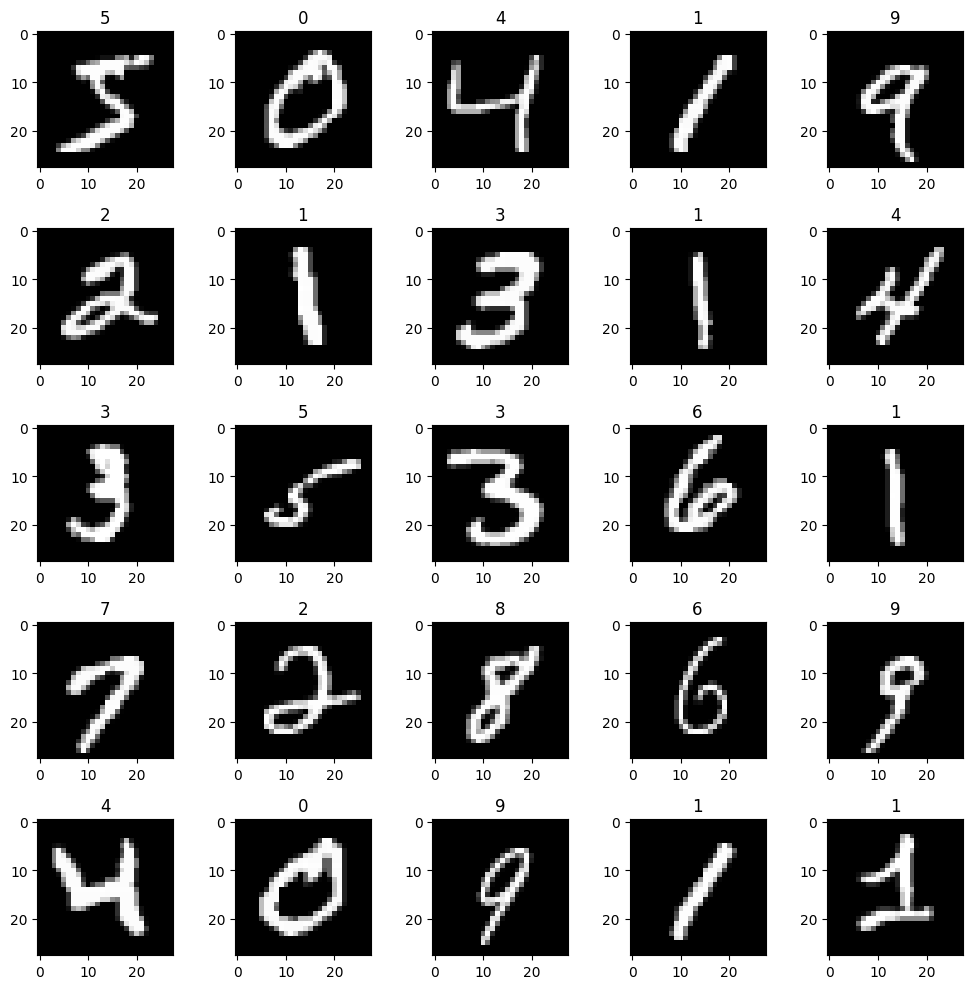

In [98]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.title(y_train[i])
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray')

In [88]:
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

In [89]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [90]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8425 - loss: 0.5743 - val_accuracy: 0.9413 - val_loss: 0.2103
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9408 - loss: 0.2006 - val_accuracy: 0.9516 - val_loss: 0.1647
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9571 - loss: 0.1532 - val_accuracy: 0.9583 - val_loss: 0.1448
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9632 - loss: 0.1270 - val_accuracy: 0.9595 - val_loss: 0.1283
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9675 - loss: 0.1082 - val_accuracy: 0.9604 - val_loss: 0.1280
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9721 - loss: 0.0957 - val_accuracy: 0.9641 - val_loss: 0.1168
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9750 - loss: 0.0872 - val_accuracy: 0.9667 - val_loss: 0.1153
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9758 - loss: 0.0789 - 

In [91]:
history = model.history.history

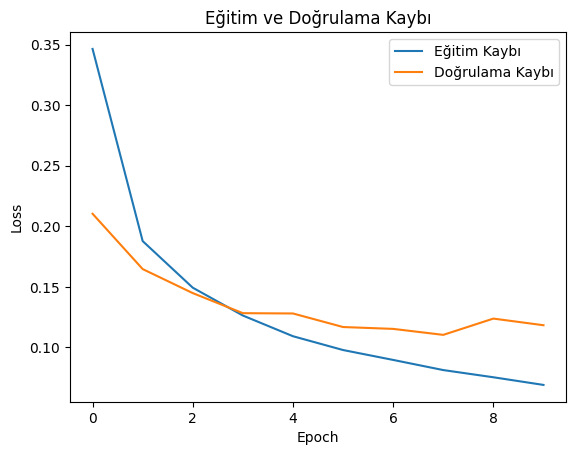

In [93]:
plt.plot(history['loss'], label='Eğitim Kaybı')
plt.plot(history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

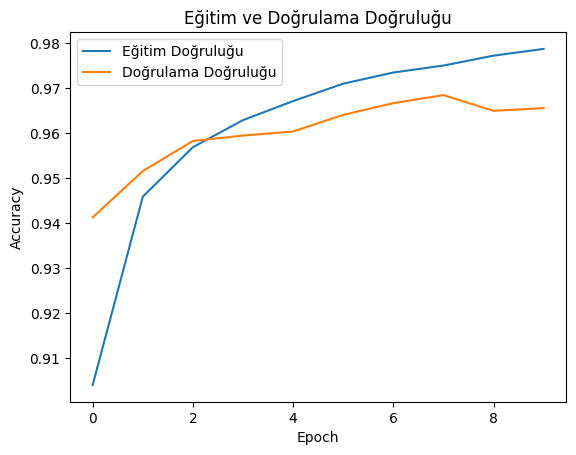

In [94]:
plt.plot(history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.legend()

In [95]:
model.save('mnist_model.h5')